<a href="https://colab.research.google.com/github/SARA3SAEED/more-practice/blob/main/DA_Le_Lab16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 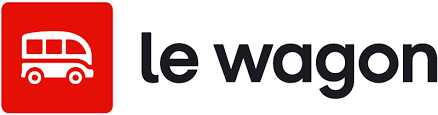

# Financial returns

Python's versatility, combined with its powerful libraries, makes it the best suited language for **financial data analysis**. 🏦🐍

In this challenge, we aim to visualize the fluctuations in share prices over time 📈📉.

## Data exploration


Execute the cell below to load financial data into a`df` variable

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


Have a look at the data types by using the `.info()`method.


In [ ]:
#your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           506 non-null    object 
 1   AAPL.Open      506 non-null    float64
 2   AAPL.High      506 non-null    float64
 3   AAPL.Low       506 non-null    float64
 4   AAPL.Close     506 non-null    float64
 5   AAPL.Volume    506 non-null    int64  
 6   AAPL.Adjusted  506 non-null    float64
 7   dn             506 non-null    float64
 8   mavg           506 non-null    float64
 9   up             506 non-null    float64
 10  direction      506 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.6+ KB


Display **statistical information** by using the appropriate function.


In [ ]:
#your code here
df.describe()

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000
mean,112.935000,113.919447,111.942016,112.958340,4.317842e+07,110.459312,107.311385,112.739865,118.168345
std,11.287490,11.251892,11.263687,11.244744,1.985253e+07,10.537529,11.095804,10.595315,10.670752
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370,85.508858,94.047166,97.572721
25%,105.482500,106.349999,104.657501,105.672499,2.974240e+07,103.484803,97.011245,104.954875,111.052267
50%,112.889999,114.145001,111.800003,113.025002,3.747460e+07,110.821123,107.351628,112.799750,118.472542
75%,122.267498,123.497500,121.599998,122.179998,5.076395e+07,119.255457,114.812152,121.889416,128.515793
max,135.669998,136.270004,134.839996,135.509995,1.622063e+08,135.509995,127.289258,129.845000,138.805366


Convert the `Date` column to **datetime** format.

In [ ]:
#your code here
df['Date'] = pd.to_datetime(df['Date'])

Now, we need to have a closer look at `Date` column.

Is it continuous? Or are there some missing days?

Count the number of rows per day of the week in the dataset.

<details>
    <summary>Hint 🔍</summary>

- you can extract the day of the week of a datetime object by calling the `.dayofweek`attribute.
- the `value_counts()` method can also help you (see [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html))

</details>

In [ ]:
#your code here
df['Date'].dt.dayofweek.value_counts()

,count
Date,
1,105
2,105
3,103
4,99
0,94


What do you notice ?

> **Your Answer Here (Double click)**


Use the `.isocalendar()` method on the Date column. What type of object does it output?

In [ ]:
#your code here
df['Date'].dt.isocalendar()

,year,week,day
0,2015,8,2
1,2015,8,3
2,2015,8,4
3,2015,8,5
4,2015,9,1
...,...,...,...
501,2017,6,5
502,2017,7,1
503,2017,7,2
504,2017,7,3


Filter `df`on January and December Data

<details>
    <summary> Hint 🔍 </summary>

- First, you need to extract the `month` from the Date column
- Have a look at the Dataframe `.isin()`method to filter on more than one value

</details>

In [ ]:
#your code here
df[df['Date'].dt.month.isin([1,12])]

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
200,2015-12-01,118.750000,118.809998,116.860001,117.339996,34852400,114.290588,112.795765,118.078000,123.360235,Decreasing
201,2015-12-02,117.339996,118.110001,116.080002,116.279999,33386600,113.258137,112.863291,117.806500,122.749709,Decreasing
202,2015-12-03,116.550003,116.790001,114.220001,115.199997,41569500,112.206202,112.900608,117.452667,122.004726,Decreasing
203,2015-12-04,115.290001,119.250000,115.110001,119.029999,57777000,115.936671,113.069761,117.279333,121.488905,Increasing
204,2015-12-07,118.980003,119.860001,117.809998,118.279999,32084200,115.206161,113.278621,117.153666,121.028712,Decreasing
...,...,...,...,...,...,...,...,...,...,...,...
489,2017-01-25,120.419998,122.099998,120.279999,121.879997,32377600,121.353858,115.170446,118.446500,121.722554,Increasing
490,2017-01-26,121.669998,122.440002,121.599998,121.940002,26337600,121.413604,115.123567,118.687000,122.250433,Increasing
491,2017-01-27,122.139999,122.349998,121.599998,121.949997,20562900,121.423555,115.190236,118.935667,122.681098,Decreasing
492,2017-01-30,120.930000,121.629997,120.660004,121.629997,30377500,121.104937,115.423840,119.163667,122.903493,Increasing


## Resampling and returns

Set the `Date`column as index.


In [ ]:
#your code here
df = df.set_index('Date')

By using the **.resample()** function, compute  the `AAPL.Open` minimum value and `AAPL.Close` median value per quarter.

<details>
    <summary> Hint 🔍 </summary>

To apply more than one aggregate function,  you can use the `.agg()` method.

</details>

In [ ]:
#your code here
df.resample('Q').agg({'AAPL.Open':'min', 'AAPL.Close':'median'})

<ipython-input-9-665c5b8b194c>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.resample('Q').agg({'AAPL.Open':'min', 'AAPL.Close':'median'})


,AAPL.Open,AAPL.Close
Date,,
2015-03-31,122.309998,127.139999
2015-06-30,124.470001,127.599998
2015-09-30,94.870003,115.274998
2015-12-31,106.959999,114.365002
2016-03-31,93.129997,98.529999
2016-06-30,90.000000,97.635002
2016-09-30,94.599998,107.210003
2016-12-31,106.570000,113.540001
2017-03-31,115.800003,121.489998


Calculate the daily returns by using the `.pct_change()` method on `AAPL.Close`.


In [ ]:
#your code here
df['AAPL.Close'].pct_change()

,AAPL.Close
Date,
2015-02-17,NaN
2015-02-18,0.006962
2015-02-19,-0.002098
2015-02-20,0.008174
2015-02-23,0.027027
...,...
2017-02-10,-0.002266
2017-02-13,0.008856
2017-02-14,0.012979


What does this line of code do ?

In [ ]:
df.resample("QS").first()[["AAPL.Open", "AAPL.Close"]].pct_change(4)

,AAPL.Open,AAPL.Close
Date,,
2015-01-01,NaN,NaN
2015-04-01,NaN,NaN
2015-07-01,NaN,NaN
2015-10-01,NaN,NaN
2016-01-01,-0.195153,-0.175859
2016-04-01,-0.128505,-0.114769
2016-07-01,-0.247518,-0.242575
2016-10-01,0.033373,0.026830
2017-01-01,0.128545,0.102515


> **Your Answer Here (Double click)**

Imagine the time saved in comparison with Excel! 🔥


Compute the quarterly mean evolution of the `AAPL.Close`

In [ ]:
#your code here
df['AAPL.Close'].resample('QE').mean()

,AAPL.Close
Date,
2015-03-31,127.054838
2015-06-30,127.938095
2015-09-30,117.303438
2015-12-31,114.299375
2016-03-31,99.655082
2016-06-30,99.401250
2016-09-30,105.866094
2016-12-31,113.399048
2017-03-31,124.229062


## Window functions

Compute the moving average of `AAPL.Close` **over the last 4 rolling days**.


In [ ]:
#your code here
df['AAPL.Close'].rolling(4).mean()

,AAPL.Close
Date,
2015-02-17,NaN
2015-02-18,NaN
2015-02-19,NaN
2015-02-20,128.625000
2015-02-23,129.917499
...,...
2017-02-10,132.027496
2017-02-13,132.467495
2017-02-14,133.212497


The `.rolling()` method allows us to specify a time window and not simply a number of previous rows. \
This is convenient to get rid of the NaN on the first rows.

Compute the moving average of `AAPL.Close` **using a sliding 30-day window**.

In [ ]:
df["AAPL.Close"].rolling("30D").mean()


,AAPL.Close
Date,
2015-02-17,127.830002
2015-02-18,128.275002
2015-02-19,128.333333
2015-02-20,128.625000
2015-02-23,129.500000
...,...
2017-02-10,124.362856
2017-02-13,125.330998
2017-02-14,125.792379


## Missing values

We are lacking Week-end days in our dataset.

To fill the gaps in our index dates, we can use the DataFrame `.asfreq()`method. \
Have a look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html) and create a new DataFrame called `df_with_weekends` that includes the week end days.

Display the 14 first rows. What do you notice ?


In [ ]:
#your code here
df_with_weekends = df.asfreq('D')
df_with_weekends.head(14)

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
Date,,,,,,,,,,
2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400.0,122.905254,106.741052,117.927667,129.114281,Increasing
2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700.0,123.760965,107.842423,118.940333,130.038244,Increasing
2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400.0,123.501363,108.894245,119.889167,130.884089,Decreasing
2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400.0,124.510914,109.785449,120.763500,131.741551,Increasing
2015-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100.0,127.876074,110.372516,121.720167,133.067817,Increasing
2015-02-24,132.940002,133.600006,131.169998,132.169998,69228100.0,127.078049,111.094869,122.664834,134.234798,Decreasing
2015-02-25,131.559998,131.600006,128.149994,128.789993,74711700.0,123.828261,113.211918,123.629667,134.047415,Decreasing


We need to get rid of all the NaNs generated by the `asfreq()`function.

Have a look at the `fillna()` method [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna), and use it to replace the missing values with the **next valid value**.

⚠️ Do not reassign the value to `df_with_weekends`.


In [ ]:
#your code here
df_with_weekends = df_with_weekends.fillna(method='bfill')


<ipython-input-18-226fd3b049d5>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_with_weekends = df_with_weekends.fillna(method='bfill')


Another method to replace missing values is to use [interpolation](https://en.wikipedia.org/wiki/Interpolation).

Have a look at the `interpolate()` method and use it to replace the missing values. \
You can update your `df_with_weekends` variable.


In [ ]:
#your code here
df_with_weekends = df_with_weekends.interpolate()

<ipython-input-19-8100c8fce277>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_with_weekends = df_with_weekends.interpolate()


## Financial charts

Time to step our charting game up! 📈📉

Up to this point, we focused our efforts on Apple share only. We are now going to include shares from multiple companies, crafting the kind of essential graphs that traders need for their decisions.

**You're about to discover why Python has earned its reputation in the financial world.** 🏦


<u>Note:</u> A **ticker** is an abbreviation used to designate a specific share on a specific stock market (**eg.** *AAPL* for Apple, *TSLA* for Tesla etc.)



---




Execute the cell below to load data from multiple tickers.

Note that the values have been rebased on Day One. In other words, what you're observing is the return instead of the original ticker value.

In [ ]:
df = px.data.stocks()

df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d', errors='coerce')
df = df.set_index("date")
df

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...
2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896


Display the evolution of `GOOG`  with a line plot.

In [ ]:
#your code here
px.line(df, y='GOOG')

Display **on the same chart** the evolution of GOOG with its minimum and maximum cumulative value.


<details>
    <summary>Hint 🔍</summary>
    
- Have a look at the `cummin()` and `cummax()` methods.
- To add a line to a Plotly chart, you can use the `.add_scatter()` method.


In [ ]:
# your code
fig = px.line(df, y='GOOG')
fig.add_scatter(y=df['GOOG'].cummin(), name='min')
fig.add_scatter(y=df['GOOG'].cummax(), name='max')
fig.show()

Display **on the same chart** the evolution of GOOG and its 10-day and 30-day moving averages.

<details>
    <summary>Hint 🔍</summary>

you might want to use the `.rolling()` method here

</details>

In [ ]:
# your code
fig = px.line(df, y='GOOG')
fig.add_scatter(y=df['GOOG'].rolling(10).mean(), name='10 days')
fig.add_scatter(y=df['GOOG'].rolling(30).mean(), name='30 days')
fig.show()

___

We will now display returns for each ticker in separate charts.

The `pd.melt()` function can transform a wide-format table into a longer, more structured format. \
It takes variables from columns and reshapes them into rows, creating a new column for variable names and another for their corresponding values.

Run the following cell.

In [ ]:
df_melt = pd.melt(df, var_name="ticker", ignore_index=False)
df_melt

,ticker,value
date,,
2018-01-01,GOOG,1.000000
2018-01-08,GOOG,1.018172
2018-01-15,GOOG,1.032008
2018-01-22,GOOG,1.066783
2018-01-29,GOOG,1.008773
...,...,...
2019-12-02,MSFT,1.720717
2019-12-09,MSFT,1.752239
2019-12-16,MSFT,1.784896


Using the `px.area()` function on the newly created DataFrame, display the returns for each ticker **in separate charts**.

<details>
    <summary> Hint 🔍 </summary>
    
A very similar example was shown in the lecture notebook.

Now might be a good time to remind yourself what `facet_col` can do!

</details>


In [ ]:
#your code here
fig = px.area(df_melt, x=df_melt.index, y='value', color='ticker')
fig.show()